In [ ]:
Задание 1
Скачать данные по ссылке https://drive.google.com/file/d/1MpAdHAl727fO3oW32NO4FpSRhUBUfjfS
Считать данные с помощью pandas
Вывести на экран первые 5 строк
1.1 Изучите количество памяти с помощью matplotlib
1.2 Изучите стоимость ноутбуков с помощью matplotlib
1.3 Изучите вес ноутбуков с помощью matplotlib
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы


In [1]:
import pandas as pd

In [27]:
df=pd.read_csv("laptops_10.csv", sep=',', encoding='latin1')

In [3]:
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


In [4]:
# !pip install matplotlib
# !python.exe -m pip install --upgrade pip
import matplotlib.pyplot as plt

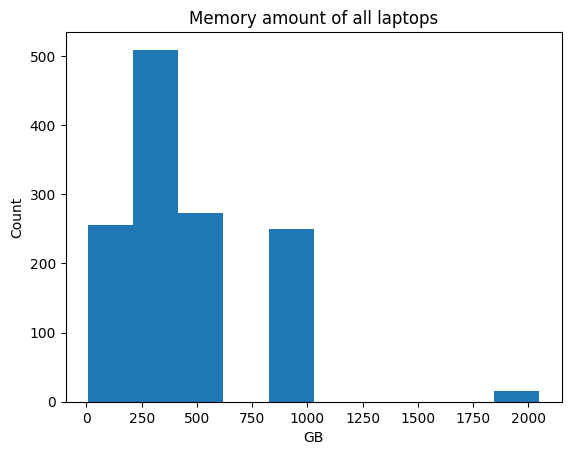

In [21]:
plt.hist(df['Memory_Amount'])
plt.title('Memory amount of all laptops')
plt.xlabel('GB')
plt.ylabel('Count');

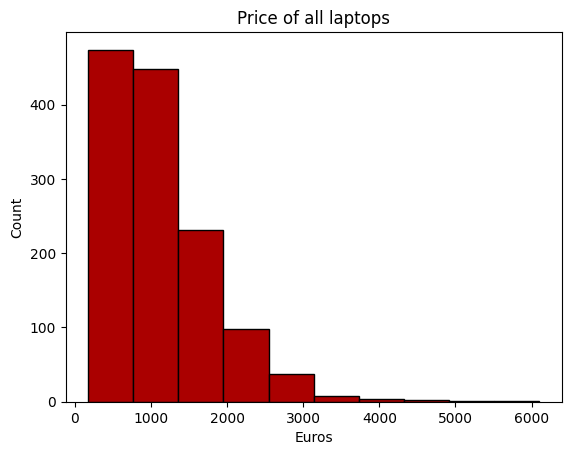

In [22]:
plt.hist(df['Price_euros'], color='#AA0000', edgecolor='black')
plt.title('Price of all laptops')
plt.xlabel('Euros')
plt.ylabel('Count');

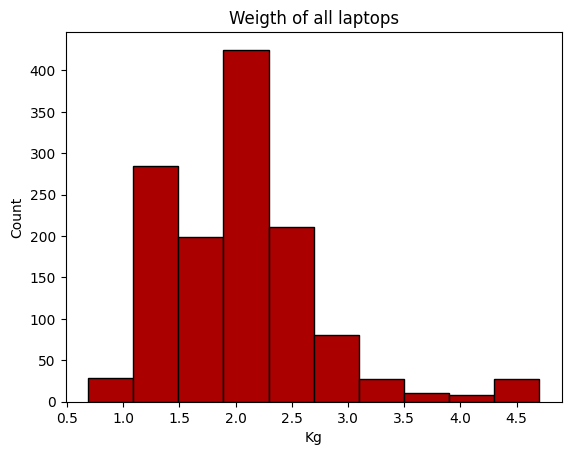

In [23]:
plt.hist(df['Weight'], color='#AA0000', edgecolor='black')
plt.title('Weigth of all laptops')
plt.xlabel('Kg')
plt.ylabel('Count');

In [ ]:
Задание 2.
2.1 Изучите распределение типов носителя
2.2 Изучите распределение компаний производителей
2.3 Изучите распределение операционной системы
2.4 Изучите распределение компаний производителей CPU

Постройте график
Сделайте выводы

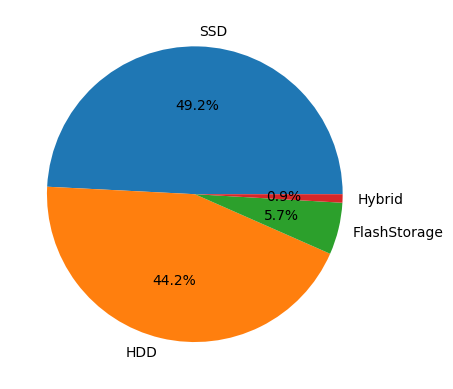

In [38]:
data=df['Memory_Type'].value_counts()
data

names = data.index
values = data.values

plt.pie(values, labels=names, autopct='%.1f%%');

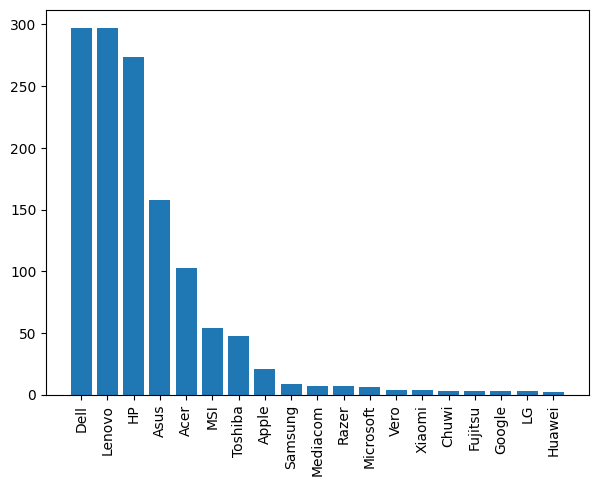

In [50]:
data=df['Company'].value_counts()
data

names = data.index
values = data.values

plt.figure(figsize=(7, 5))
plt.bar(names, values)
plt.xticks(rotation=90);

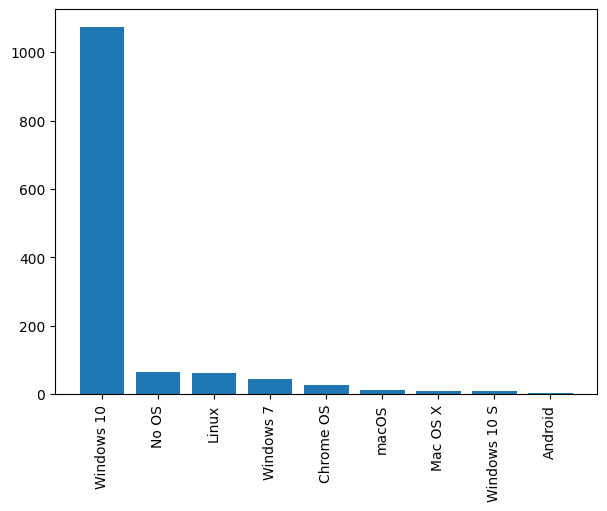

In [54]:
data=df['OpSys'].value_counts()
data

names = data.index
values = data.values

plt.figure(figsize=(7, 5))
plt.bar(names, values)
plt.xticks(rotation=90);

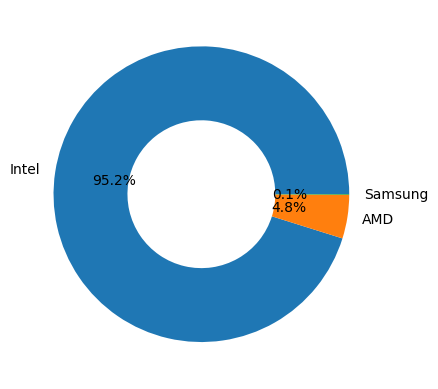

In [58]:
data=df['Cpu_Company'].value_counts()
data

names = data.index
values = data.values

plt.pie(values, labels=names, autopct='%.1f%%', wedgeprops=dict(width=0.5));

In [ ]:
Задание 3
Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте

3.1 Постройте график в абсолютных величинах
3.2 Постройте график в относительных величинах

In [8]:
data=pd.crosstab(index=df['Company'], columns=df['Cpu_Company'])
data = data.drop(columns=['Samsung']).reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


In [9]:
import numpy as np

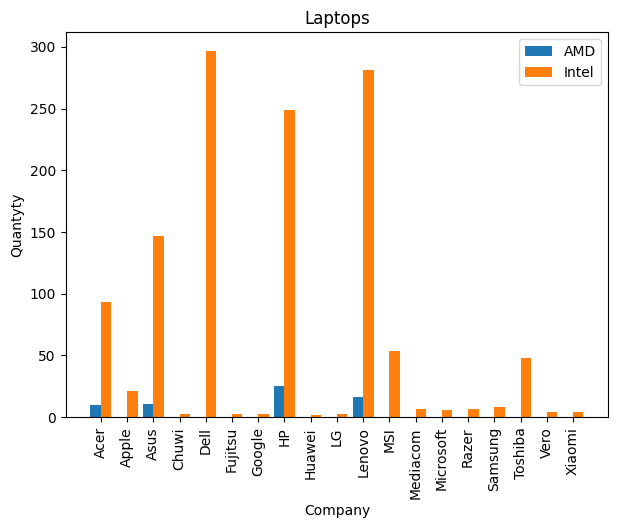

In [10]:
plt.figure(figsize=(7, 5))
n_ticks = np.arange(len(data['AMD']))
offset= 0.2
w = 0.4

plt.bar(n_ticks-offset, data['AMD'], width=w)
plt.bar(n_ticks+offset, data['Intel'], width=w)

plt.title('Laptops')
plt.xlabel('Company')
plt.ylabel('Quantyty')
plt.legend(['AMD', 'Intel'])
plt.xticks(n_ticks, data['Company'], rotation=90);

In [11]:
data=pd.crosstab(index=df['Company'], columns=df['Cpu_Company'], normalize='index')
data = data.drop(columns=['Samsung']).reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000
5,Fujitsu,0.000000,1.000000
6,Google,0.000000,1.000000
7,HP,0.091241,0.908759
8,Huawei,0.000000,1.000000
9,LG,0.000000,1.000000


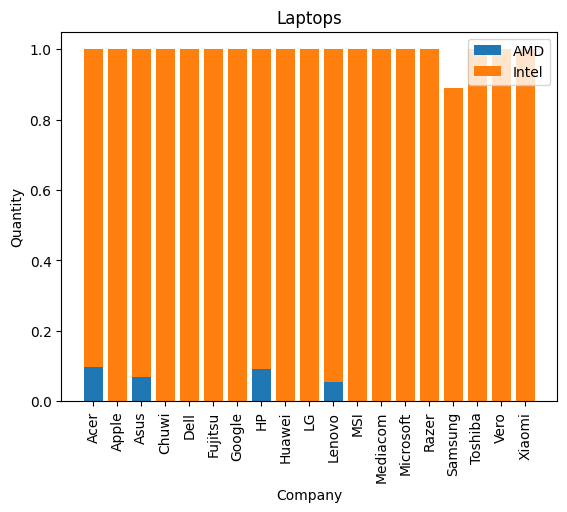

In [13]:
plt.bar(data['Company'], data['AMD'])
plt.bar(data['Company'], data['Intel'], bottom=data['AMD'])

plt.title('Laptops')
plt.xlabel('Company')
plt.ylabel('Quantity')
plt.legend(['AMD', 'Intel'])
plt.xticks(n_ticks, data['Company'], rotation=90);

In [ ]:
# Задание 4.
# 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора
# 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти
# 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти
# 4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя
# Постройте график
# Назовите график
# Сделайте именование оси x и оси y
# Сделайте выводы

In [16]:
# 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора
# !pip install seaborn
import seaborn as sns

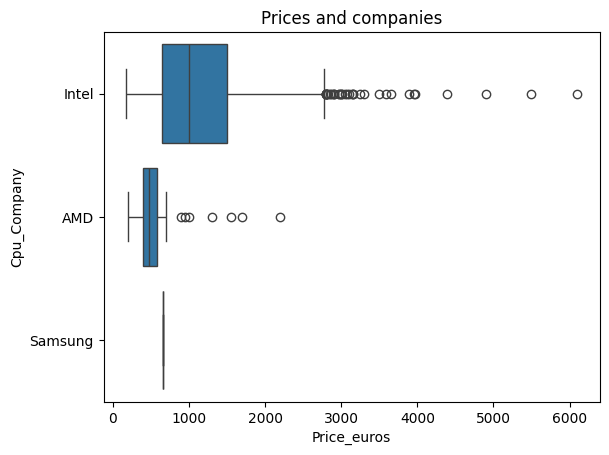

In [21]:
sns.boxplot(x=df['Price_euros'], y=df['Cpu_Company'])



plt.title('Prices and companies')
plt.xlabel('Price_euros')
plt.ylabel('Cpu_Company');

In [ ]:
Задание 5*.
Постройте матрицу корреляций для таблицы

In [26]:
corr_matrix=df.corr()
corr_matrix=np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix)<0.3] = 0
corr_matrix

ValueError: could not convert string to float: 'Apple'